
Demo to Raghu

twoSpirals

In [35]:
import pandas as pd
import numpy as np

file_path = '/Users/hunjunsin/Desktop/Jun/Unsupervised/hw3A/twoSpirals.txt'

data = pd.read_csv(file_path, sep='\t', header=None)

print(data.head())

X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

y_mapped = (y == 1).astype(int)

         0        1    2
0  10.5192  -0.7170 -1.0
1   0.9987  -9.9681 -1.0
2   3.5763   8.3756 -1.0
3   1.9236 -10.6448 -1.0
4   8.1583  -5.9066 -1.0


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.665
Confusion matrix:
 [[60 36]
 [31 73]]


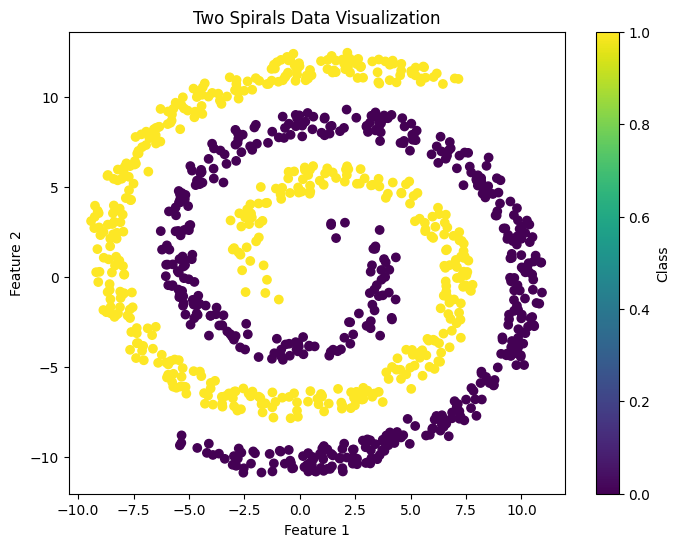

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_mapped, cmap='viridis', marker='o')
plt.title("Two Spirals Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

In [ ]:
import numpy as np

# X (N,D)
N = X.shape[0]

X2 = np.sum(X**2, axis=1)  # shape: (N,)

# distance matrix (N,N)
DIST_euclid = X2[:, np.newaxis] + X2[np.newaxis, :] - 2 * np.dot(X, X.T)

# Gaussian kernel
sigma = 3
K = np.exp(-DIST_euclid / sigma)

# center the kernel matrix
U = np.ones((N, N)) / N
Kn = K - np.dot(U, K) - np.dot(K, U) + np.dot(np.dot(U, K), U)

# eigen decomposition
eigvals, eigvecs = np.linalg.eigh(Kn)

# sort eigenvalues and eigenvectors
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# project data
XG = np.dot(Kn, eigvecs)

2 dimension

In [45]:
X2G = XG[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X2G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.585
Confusion matrix:
 [[70 26]
 [57 47]]


After Kernel PCA to 2 dimension

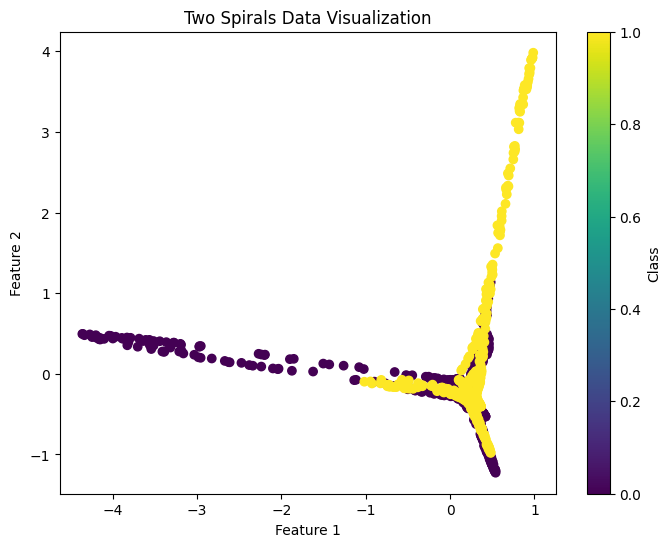

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X2G[:, 0], X2G[:, 1], c=y_mapped, cmap='viridis', marker='o')
plt.title("Two Spirals Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

3 dimension

In [47]:
X3G = XG[:, :3]

X_train, X_test, y_train, y_test = train_test_split(X3G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.66
Confusion matrix:
 [[56 40]
 [28 76]]


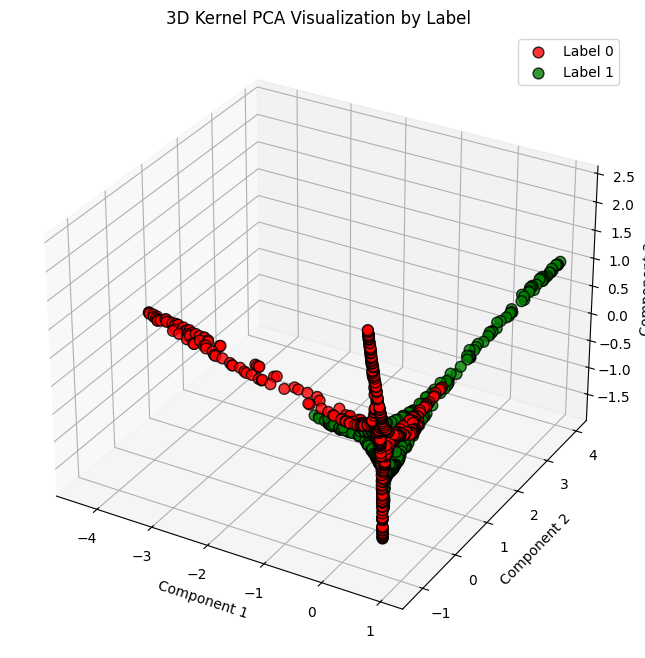

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

unique_labels = np.unique(y_mapped)

colors = ['r', 'g'] 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(unique_labels, colors):
    indices = np.where(y_mapped == label)
    ax.scatter(X3G[indices, 0], X3G[indices, 1], X3G[indices, 2],
               c=color, label=f'Label {label}', s=60, edgecolor='k', alpha=0.8)

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.legend()
plt.title("3D Kernel PCA Visualization by Label")
plt.show()

15 dimension

In [ ]:
X15G = XG[:, :15]     
X_train, X_test, y_train, y_test = train_test_split(X15G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Confusion matrix:
 [[83 13]
 [19 85]]


20 dimension

In [ ]:
X20G = XG[:, :20]
X_train, X_test, y_train, y_test = train_test_split(X20G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Confusion matrix:
 [[95  1]
 [ 5 99]]


40 dimension

In [ ]:
X40G = XG[:, :40]
X_train, X_test, y_train, y_test = train_test_split(X40G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.985
Confusion matrix:
 [[ 95   1]
 [  2 102]]


---
threecircles
---

In [52]:
import pandas as pd
import numpy as np

file_path = '/Users/hunjunsin/Desktop/Jun/Unsupervised/hw3A/threecircles.txt'

data = pd.read_csv(file_path, sep=',', header=None)
print(data.head())

X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

label_mapping = {-1: 0, 0: 1, 1: 2}
y_mapped = np.array([label_mapping[label] for label in y])

          0         1  2
0 -0.208626 -0.264189 -1
1  0.499955 -0.073624 -1
2 -0.241661 -0.221071 -1
3 -0.356841  0.204201 -1
4  0.529480  0.170605 -1


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.275
Confusion matrix:
 [[10 34 27]
 [15 20 28]
 [26 15 25]]


In [56]:
import numpy as np

N = X.shape[0]

X2 = np.sum(X**2, axis=1)  # shape: (N,)

DIST_euclid = X2[:, np.newaxis] + X2[np.newaxis, :] - 2 * np.dot(X, X.T)

sigma = 3
K = np.exp(-DIST_euclid / sigma)

U = np.ones((N, N)) / N
Kn = K - np.dot(U, K) - np.dot(K, U) + np.dot(np.dot(U, K), U)

eigvals, eigvecs = np.linalg.eigh(Kn)

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

XG = np.dot(Kn, eigvecs)

In [ ]:
X3G = XG[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X3G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion matrix:
 [[71  0  0]
 [ 0 63  0]
 [ 0  0 66]]


/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


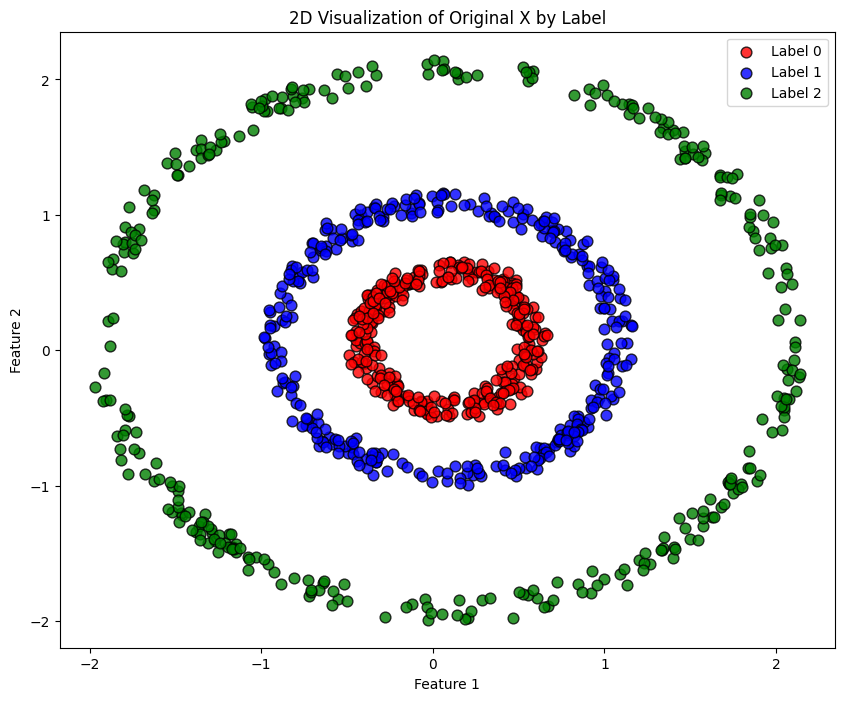

In [58]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(y_mapped)
color_dict = {0: 'r', 1: 'b', 2: 'g'}

plt.figure(figsize=(10,8))

for label in unique_labels:
    indices = np.where(y_mapped == label)
    plt.scatter(X[indices, 0], X[indices, 1],
                c=color_dict[label], label=f'Label {label}',
                s=60, edgecolor='k', alpha=0.8)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Visualization of Original X by Label")
plt.legend()
plt.show()

Visualized after kernel pca

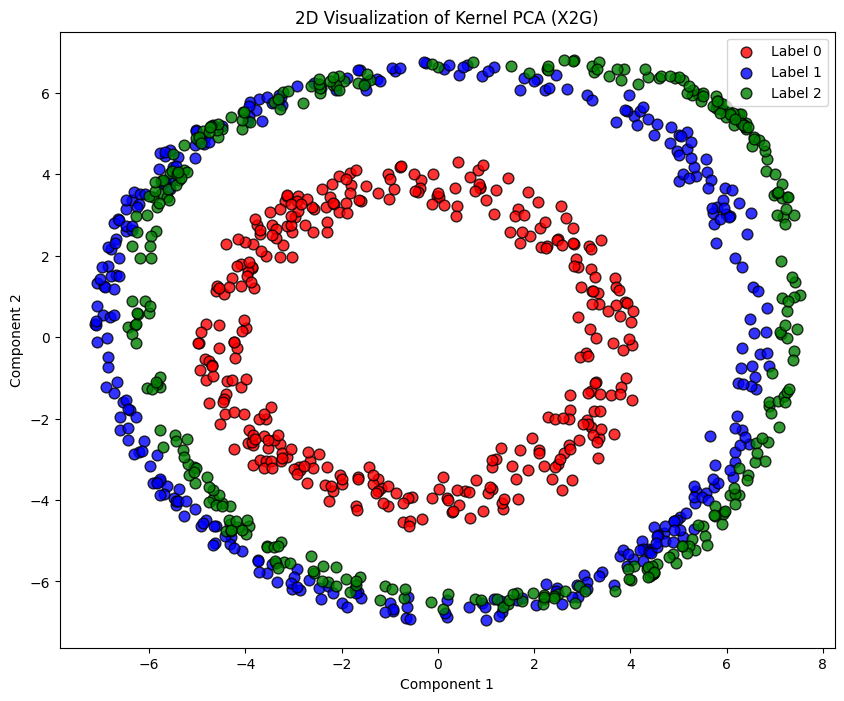

In [59]:
import matplotlib.pyplot as plt
import numpy as np

X2G = XG[:, :2]

unique_labels = np.unique(y_mapped)
color_dict = {0: 'r', 1: 'b', 2: 'g'}

plt.figure(figsize=(10,8))
for label in unique_labels:
    indices = np.where(y_mapped == label)
    plt.scatter(X2G[indices, 0], X2G[indices, 1],
                c=color_dict[label],
                label=f'Label {label}',
                s=60, edgecolor='k', alpha=0.8)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("2D Visualization of Kernel PCA (X2G)")
plt.legend()
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X2G, y_mapped, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.32
Confusion matrix:
 [[25 22 24]
 [26 11 26]
 [29  9 28]]


/Users/hunjunsin/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


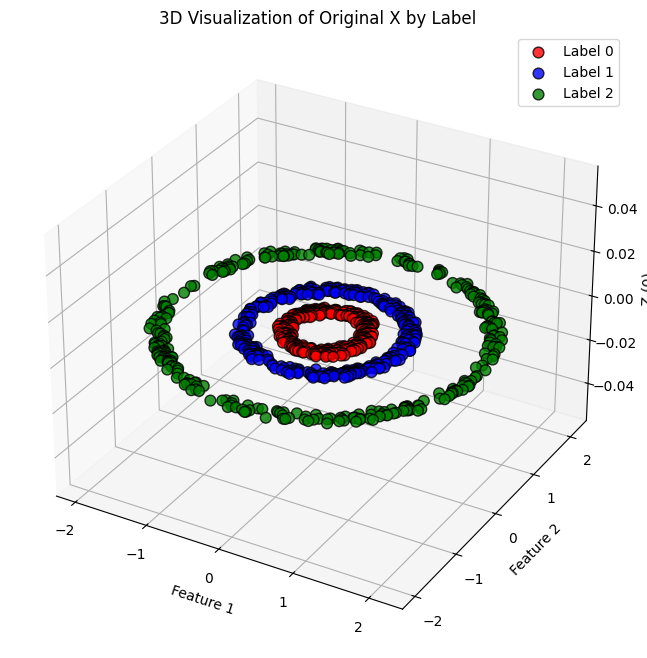

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np

unique_labels = np.unique(y_mapped)
color_dict = {0: 'r', 1: 'b', 2: 'g'}

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

z_coord = np.zeros(X.shape[0])

for label in unique_labels:
    indices = np.where(y_mapped == label)
    ax.scatter(X[indices, 0], X[indices, 1], z_coord[indices],
               c=color_dict[label], label=f'Label {label}',
               s=60, edgecolor='k', alpha=0.8)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Z (0)')
ax.legend()
plt.title('3D Visualization of Original X by Label')
plt.show()

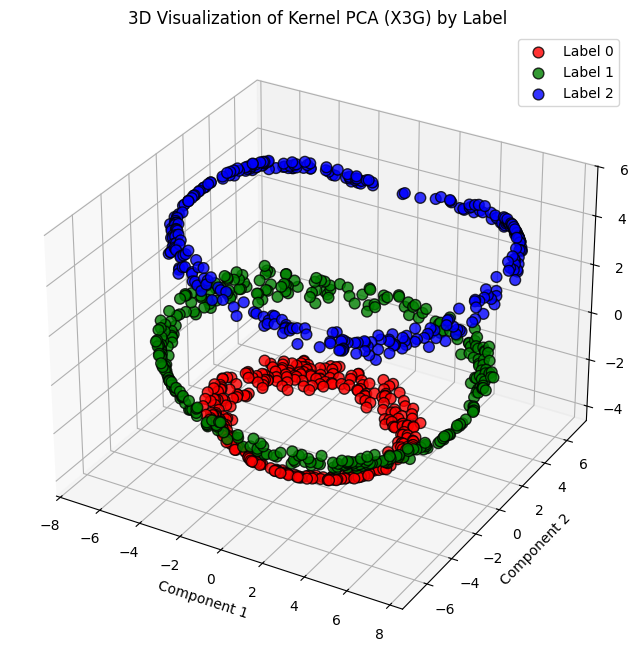

In [62]:
unique_labels = np.unique(y_mapped)
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(unique_labels, colors):

    indices = np.where(y_mapped == label)
    ax.scatter(X3G[indices, 0], X3G[indices, 1], X3G[indices, 2],
               c=color, label=f'Label {label}', s=60, edgecolor='k', alpha=0.8)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.title('3D Visualization of Kernel PCA (X3G) by Label')
plt.show()